# Apply PCA to an InSAR time series

In [1]:
from sklearn.decomposition import PCA
import scipy.io as sio
import matplotlib.pyplot as plt

In [4]:
displacements_mat = sio.loadmat('LUSI_displacements_Shirzei_etal.mat')
displacement_time_series = displacements_mat['TempDenoise_TimeSeries']

elpx_mat = sio.loadmat('elpx_ll.mat')
latlon = elpx_mat['elpx_ll']
print(displacement_time_series.shape)

(350972, 25)


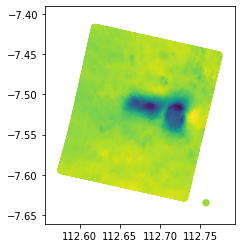

In [3]:
# Plot the data
plt.figure()
plt.scatter(latlon[:,0],latlon[:,1],c=displacement_time_series[:,-1])
ax=plt.gca()
ax.set_aspect('equal','box')
plt.show()

In [5]:
# Get information about size of dataset
print(latlon.shape)
print(displacement_time_series.shape)

(350972, 2)
(350972, 25)


# PCA - idea and approach

The dataset consists of displacement measurements made at 25 instants in time and at 350972 points in space.
We can think about this as a problem where we've made a 350972-dimensional quantity 25 times. What we'd like to know is what is the dominant spatial pattern of variation, and how has that changed over time?

Setting up and solving the eigenvector/eigenvalue problem manually for a dataset this size will be prohibitively expensive, but we can use scikit-learn to compute just the first couple of principal components and their associated weights.

In [7]:
sar_pca = PCA(n_components=10)
sar_pca.fit(displacement_time_series.transpose()) # number of samples by number of features

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
sar_pca.explained_variance_ratio_

array([0.9167132 , 0.02459328, 0.01296573, 0.00919865, 0.0079434 ,
       0.00505784, 0.00413947, 0.00307987, 0.00242923, 0.00226335],
      dtype=float32)

In [ ]:
# This will transform the data into the coordinate system defined by the 
component_amplitudes=sar_pca.transform(displacement_time_series.transpose())
components=sar_pca.components_

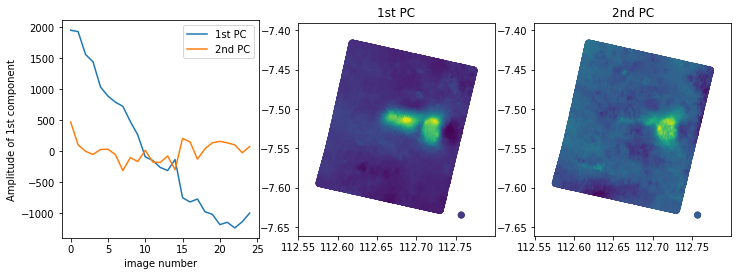

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot(component_amplitudes[:,0],label='1st PC')
ax[0].plot(component_amplitudes[:,1],label='2nd PC')
ax[0].legend()
ax[0].set_ylabel('Amplitude of 1st component')
ax[0].set_xlabel('image number')

ax[1].scatter(latlon[:,0],latlon[:,1],c=components[0,:])
ax[1].set_aspect('equal')
ax[1].set_title('1st PC')
ax[2].scatter(latlon[:,0],latlon[:,1],c=components[1,:])
ax[2].set_aspect('equal')
ax[2].set_title('2nd PC')
plt.show()